**1. Introducción**

El sector aeronáutico ha atravesado cambios profundos en la última década, influenciados por factores económicos, sociales y tecnológicos que han redefinido la forma en que las personas viajan. Las aerolíneas, como actores clave de la conectividad global, han debido adaptarse a nuevas dinámicas de demanda, a la competencia creciente y a eventos disruptivos como la pandemia de 2020.

Este análisis tiene como propósito examinar el comportamiento de los vuelos entre 2015 y 2024, identificando patrones en rutas, frecuencias y clases de viaje, así como tendencias relacionadas con la puntualidad y los precios. Asimismo, se busca comprender cómo elementos externos —como la estacionalidad o las transformaciones en la industria del transporte aéreo— han impactado en el desempeño de la aerolínea.

**2.Preparación y Carga de Datos**

En esta etapa se incorporan las librerías necesarias para el análisis y la visualización de la información (pandas, numpy, matplotlib, seaborn) y se importa el dataset con los registros de vuelos de la aerolínea (2015–2024).

Las variables incluidas en el conjunto de datos son:

Airline: nombre de la aerolínea.

Flight: código de vuelo.

Source City: ciudad de origen.

Departure Time: hora de salida en intervalos.

Stops: número de escalas.

Arrival Time: hora de llegada en intervalos.

Destination City: ciudad de destino.

Class: clase del asiento (Business/Economy).

Duration: duración del vuelo en horas.

Days Left: días restantes entre la reserva y el viaje.

Price: precio del billete.

Los datos para el Análisis Exploratorio fueron tomados de:


https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data/data

Previamente, descargamos el dataset desde el enlace compartido en la parte superior. Luego, ejecutamos las siguientes líneas de código, para cargar el dataset.

In [2]:
from google.colab import files

uploaded = files.upload()

Saving airlines_flights_data.csv to airlines_flights_data.csv


**Lectura del Dataset**

Una vez cargado el dataset, se procede a la lectura del archivo tomando en cuenta el formato en el que se encuentra almacenado.

In [3]:
#Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar dataset
#Para archivos almacenados en formato CSV: pd.read_csv
#df objeto del tipo DataFrame
df = pd.read_csv("airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**3. Exploración inicial**

Antes de avanzar en el análisis, se examina la estructura del dataset:

  * Contiene 50.000 registros y 11 variables.

  * No se identifican valores nulos.

  * Los datos corresponden al periodo 2015–2024.

  * Las estadísticas descriptivas muestran que el precio promedio del billete ronda los 12.000 (unidad monetaria del dataset), con gran variación según la clase de asiento.

  * La duración de los vuelos oscila entre recorridos cortos de menos de 2 horas y trayectos largos superiores a 10 horas.

  * Se observa amplia diversidad en las rutas: algunas con muy baja frecuencia y otras con miles de vuelos programados en el periodo.

In [5]:
df.shape # Dimensión del dataset,es decir, cuántas filas y columnas tiene.

(300153, 12)

In [6]:
df.columns #Permite ver los nombres de las columnas

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df.info()  #Permite obtener un resumen completo del DataFrame, incluyendo información sobre las columnas y sus tipos de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


**Variables en Python**

En análisis de datos con Python, las variables se clasifican principalmente en numéricas y categóricas.

  * **Numéricas**, representan valores cuantitativos que se pueden medir y operar, como precio de boletos, cantidad de pasajeros o duración de vuelos, y se analizan con estadísticas y gráficos como histogramas o boxplots.

  * **Categóricas**, representan categorías o etiquetas sin valor numérico directo, como modelo de avión, región de operación o clase de ticket, y se estudian mediante conteos, proporciones y gráficos de barras o torta.

En Python, hay codigos que permiten identificar los tipos de datos, resumir las variables numéricas, mostrar los valores únicos de variables categóricas, etc. Eso se presentara a continuación.

**3.1 Variables Numericas**

In [9]:
df.isnull().sum() # Detectar valores nulos.

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [8]:
df.describe() # Obtener estadísticas básicas.

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


**3.2. Variables Categoricas**

**Propósito:**

  * Devuelve un array con todos los modelos de avión presentes en el dataset, sin repeticiones.

  * Devuelve las regiones geográficas donde se realizaron los vuelos.

  * Devuelve las categorías de clasificación de ventas de boletos (por ejemplo, clase económica, business, primera clase).

  * Devuelve los tipos de vuelo o transmisión de información asociada a cada registro (por ejemplo, vuelo nacional, internacional, charter).

In [11]:
df.airline.unique() #Muestra todos los valores distintos que existen en la columna indicada, en este caso las aerolineas existentes.

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [12]:
df.destination_city.unique() #Destinos.

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

**4. Análisis Exploratorio**

Este proceso permite examinar y resumir un dataset antes de aplicar modelos o tomar decisiones.

El objetivo es entender la estructura, calidad y patrones de los datos, identificar valores faltantes o inconsistentes, y conocer la distribución de variables numéricas y categóricas.

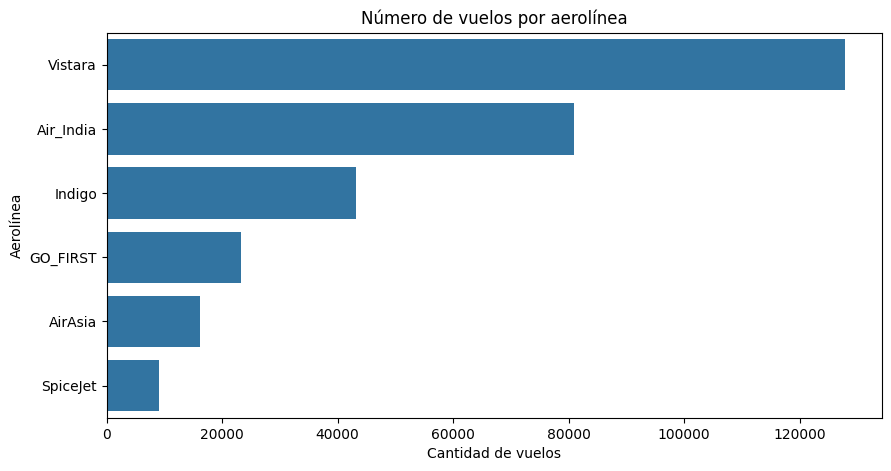

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(y="airline", data=df, order=df['airline'].value_counts().index)
plt.title("Número de vuelos por aerolínea")
plt.xlabel("Cantidad de vuelos")
plt.ylabel("Aerolínea")
plt.show()

Podemos identificar las aerolíneas con mayor volumen de vuelos, observando en primer lugar la aerolinea "Vistara" con mas de 120.000 vuelos.

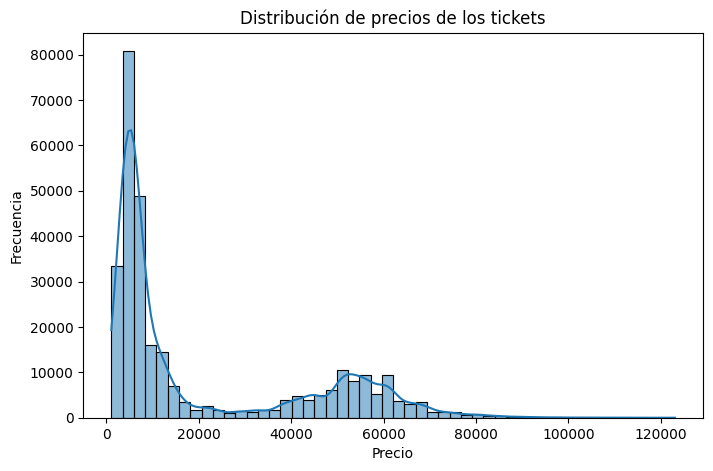

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de precios de los tickets")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


Nos muestra si los precios están concentrados en un rango bajo, medio o alto.

/tmp/ipython-input-2239896236.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="airline", y="price", data=df, estimator="mean", ci=None)


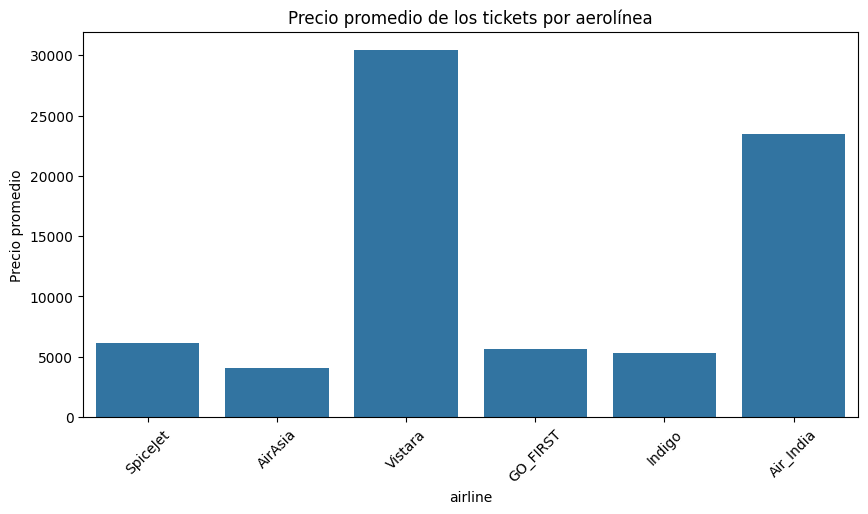

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(x="airline", y="price", data=df, estimator="mean", ci=None)
plt.title("Precio promedio de los tickets por aerolínea")
plt.ylabel("Precio promedio")
plt.xticks(rotation=45)
plt.show()


Compara qué aerolínea tiende a tener precios más altos.

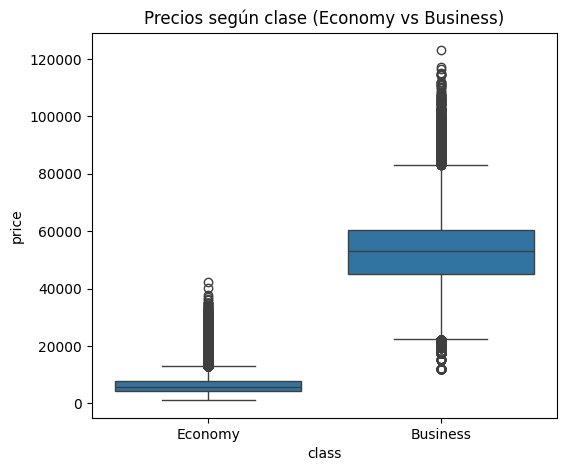

In [7]:
plt.figure(figsize=(6,5))
sns.boxplot(x="class", y="price", data=df)
plt.title("Precios según clase (Economy vs Business)")
plt.show()

Muestra la diferencia de precios entre clases y la dispersión.

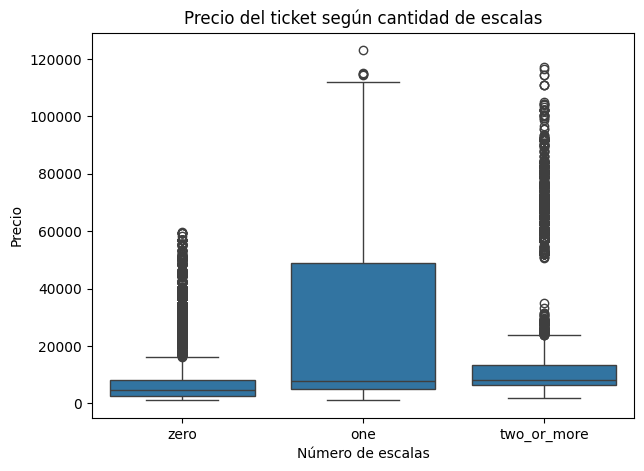

In [8]:
plt.figure(figsize=(7,5))
sns.boxplot(x="stops", y="price", data=df)
plt.title("Precio del ticket según cantidad de escalas")
plt.xlabel("Número de escalas")
plt.ylabel("Precio")
plt.show()


Permite ver si los vuelos directos son más caros que los con escalas.

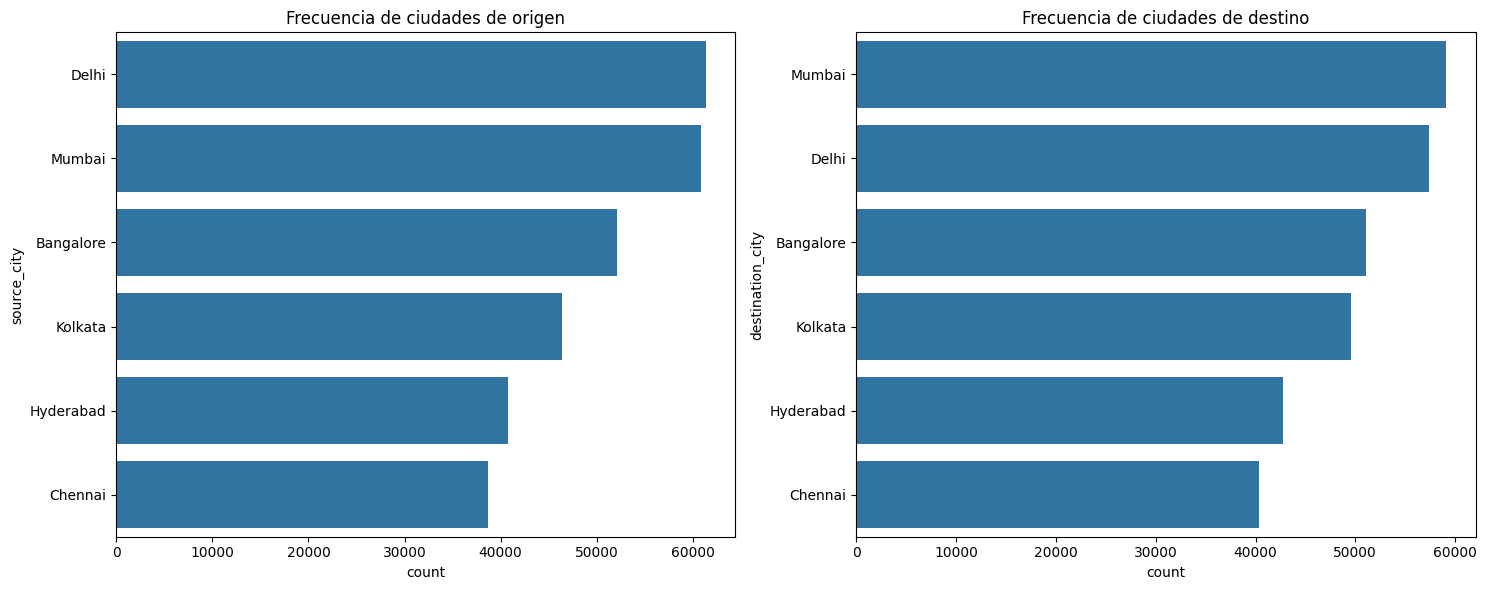

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(y="source_city", data=df, order=df['source_city'].value_counts().index, ax=ax[0])
ax[0].set_title("Frecuencia de ciudades de origen")

sns.countplot(y="destination_city", data=df, order=df['destination_city'].value_counts().index, ax=ax[1])
ax[1].set_title("Frecuencia de ciudades de destino")

plt.tight_layout()
plt.show()


Identifica los aeropuertos más usados.

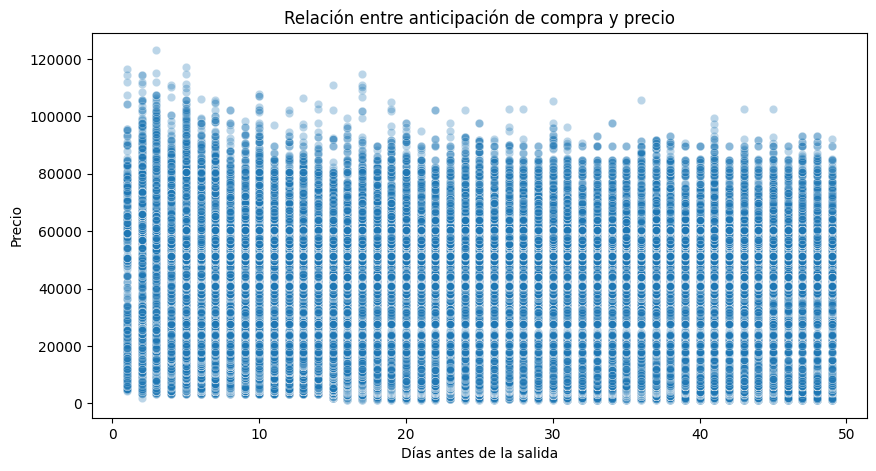

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="days_left", y="price", data=df, alpha=0.3)
plt.title("Relación entre anticipación de compra y precio")
plt.xlabel("Días antes de la salida")
plt.ylabel("Precio")
plt.show()


Sirve para analizar si comprar con anticipación reduce el precio.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(x="departure_time", data=df, ax=ax[0], order=df['departure_time'].value_counts().index)
ax[0].set_title("Frecuencia de vuelos según hora de salida")

sns.countplot(x="arrival_time", data=df, ax=ax[1], order=df['arrival_time'].value_counts().index)
ax[1].set_title("Frecuencia de vuelos según hora de llegada")

plt.tight_layout()
plt.show()


Revela si hay horarios más populares para salir o llegar.

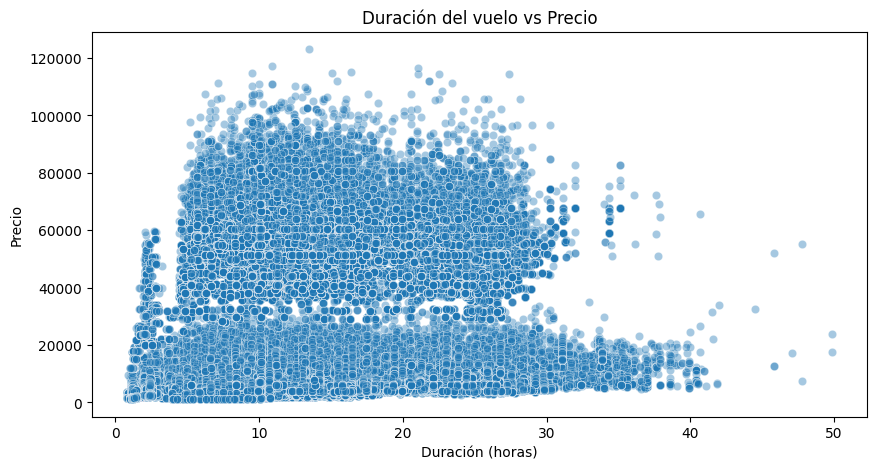

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="duration", y="price", data=df, alpha=0.4)
plt.title("Duración del vuelo vs Precio")
plt.xlabel("Duración (horas)")
plt.ylabel("Precio")
plt.show()


Analiza si los vuelos más largos son siempre más caros.